In [ ]:
"""
# Case Study Title:
Advanced Weather Routing via LangGraph with an example of  an Agentic AI Workflow

"""

In [ ]:
"""
# Project Context:
In this project, I show that LangGraph, using an agentic AI pipeline, is used to make self-motivated workflow. This project has a system used
for adapting environmental conditions such as weather and then taking smart decisions in the favor of weather status. Without human interfering, 
this system does self-reasoning for selecting a reliable path which is demanding in cutting age AI agent structure. Moreover, Agentic AI system is
stable. We can easily load our projects into this environment and select a branch under holding basic principles such as smart AI agents, 
data flow, and decision-making systems of AI pipeline’s structure. 

"""

In [ ]:
"""
# Technical Stack:
•	Coding language: Python, 
•	Jupyter notebook
•	LangGraph,
•	Agentic AI,
•	TypedDict (from typing),
•	IPython.display,

"""

In [ ]:
"""
# Target Outcomes:

The main goals of this project are: 
•	Present conditional routing with the help of Agentic AI pipeline and LangGraph.
•	Act on logic-based routes such as light rain, heavy rain, mild sunny, hot sunny according to weather conditions.
•	Show self-operating systems specially used for AI agents.

"""

In [ ]:
"""
# Notable Features:
•	Four nodes (functions) applied for 4 different weather results such as light rain, heavy rain, mild sunny, and hot sunny.
•	conditional_weather_routing represents conditional flow. 
•	A TypedDict (Weatherstate) applied to state data flow schema.
•	draw_mermaid_png() used for holistic process integration and visualization
•	Clearly shown how to handle error if there are some rare occurrences.
•	Each node processes separately, like human making decisions.
•	Automated Agentic AI pipelines. 

"""

In [1]:

from typing import TypedDict

# define the shape of weather state

class Weatherstate(TypedDict):
    """
    Weatherstate(TypedDict) has a key and its type. Each node (function) receives key:type and returns some results. In this graph,
    key:type is current weather condition: string.
    
    """
    current_weather_condition: str



In [3]:
from langgraph.graph import StateGraph

# set up the LangGraph pipeline engine 
langgraph_pipeline_engine = StateGraph(Weatherstate)   # Build a StateGraph

In [6]:
# Each function carries the current Weatherstate dictionary and returns the results from Weatherstate.

def weatherstate_node(context: Weatherstate)  ->  Weatherstate:
    """
    'context: Weatherstate'  represents parameter. 
    Weatherstate is return. It goes into the langgraph pipeline. 

    """
    print('Working on the current_weather_condition')
    return context


def light_rain_node(context:Weatherstate) -> Weatherstate:
    
    print('I saw light rain. I walked outside with a small umbrella.') 

    # Inside this function, you can design your project. 
    
    return context

def heavy_rain_node(context:Weatherstate) -> Weatherstate:
    
    print(' I saw heavy rain. I walked outside with a large umbrella.')

    # create your project. 
    
    return context
    
def mild_sunny_node(context:Weatherstate) -> Weatherstate:
    
    print('I am feeling mildly sunny outside. So, I need to carry a sunglasses.')

    # make a project. 
    
    return context

def hot_sunny_node(context:Weatherstate) -> Weatherstate:
    
    print('I am feeling hot and sunny weather. So, I need to wear sunglasses and a hat. I would like to be hydrated.')  

    # make a project. 
    
    return context

In [8]:

# state the conditional weather routing function

def conditional_weather_routing(context:Weatherstate) -> str:
   
    weather = context.get('current_weather_condition')
    
    if weather == 'light_rain':
        return  'light_rain'
        
    elif  weather == 'heavy_rain':
        return  'heavy_rain'
        
    elif weather == 'mild_sunny':
        return  'mild_sunny'

    elif weather == 'hot_sunny':
        return  'hot_sunny'

    else:
        raise ValueError(f'I could not get one of my expected weather conditions: { weather }')

In [10]:
# load all nodes into the langGraph_pipeline_engine.

#langgraph_pipeline_engine.add_node('Weatherstate_node', weatherstate_node) 

langgraph_pipeline_engine.add_node('weatherstate_node', weatherstate_node)
langgraph_pipeline_engine.add_node('light_rain', light_rain_node)   
langgraph_pipeline_engine.add_node('heavy_rain', heavy_rain_node)
langgraph_pipeline_engine.add_node('mild_sunny', mild_sunny_node)
langgraph_pipeline_engine.add_node('hot_sunny', hot_sunny_node)


In [12]:
from langgraph.graph import START, END

# state edge
# langgraph starts from the weatherstate_node
langgraph_pipeline_engine.add_edge(START, 'weatherstate_node')  


In [14]:
# Consider the leftover edges and make a flow from  weatherstate_node to end. 

langgraph_pipeline_engine.add_conditional_edges('weatherstate_node', conditional_weather_routing, 
    ['light_rain', 'heavy_rain', 'mild_sunny', 'hot_sunny'])

In [16]:
# state final edge for each weather node

langgraph_pipeline_engine.add_edge('light_rain', END)
langgraph_pipeline_engine.add_edge( 'heavy_rain', END)
langgraph_pipeline_engine.add_edge( 'mild_sunny', END)
langgraph_pipeline_engine.add_edge( 'hot_sunny', END)


In [18]:
# to get an operational graph structure, we need to compile the langgraph pipeline engine
compiled_langgraph = langgraph_pipeline_engine.compile()

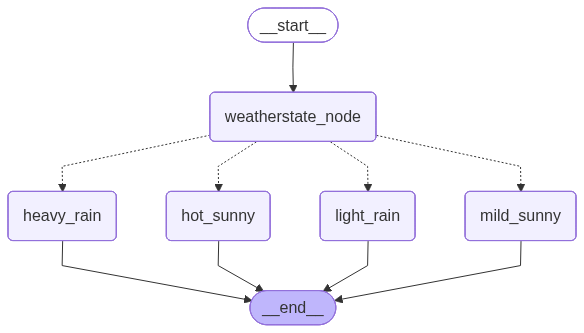

In [21]:
from IPython.display import Image, display
display(Image(compiled_langgraph.get_graph().draw_mermaid_png()))


In [ ]:
# If do not believe it, we need to check all options 

In [23]:
# Check for light rain
print('\n  weather condition for light rain  \n')

light_rain_frist = {'current_weather_condition': 'light_rain'} 

light_rain_outcome = compiled_langgraph.invoke(light_rain_frist)


  weather condition for light rain  

Working on the current_weather_condition
I saw light rain. I walked outside with a small umbrella.


In [25]:
# Check for heavy rain
print('\n  weather condition for heavy rain  \n')

heavy_rain_frist = {'current_weather_condition': 'heavy_rain'} 

heavy_rain_outcome = compiled_langgraph.invoke(heavy_rain_frist)


  weather condition for heavy rain  

Working on the current_weather_condition
 I saw heavy rain. I walked outside with a large umbrella.


In [27]:
# Check for mild sunny
print('\n  weather condition for mild sunny  \n')

mild_sunny_frist = {'current_weather_condition': 'mild_sunny'} 

mild_sunny_outcome = compiled_langgraph.invoke(mild_sunny_frist)


  weather condition for mild sunny  

Working on the current_weather_condition
I am feeling mildly sunny outside. So, I need to carry a sunglasses.


In [29]:
# Check for hot sunny
print('\n  weather condition for hot sunny  \n')

hot_sunny_frist = {'current_weather_condition': 'hot_sunny'} 

hot_sunny_outcome = compiled_langgraph.invoke(hot_sunny_frist)


  weather condition for hot sunny  

Working on the current_weather_condition
I am feeling hot and sunny weather. So, I need to wear sunglasses and a hat. I would like to be hydrated.


In [31]:
# giving a wrong example

print('\n it goes through ValueError route  \n')
first_input_not_valid = {'current_weather_condition': 'hot and cold'} 
try:
    result_invalid = compiled_langgraph.invoke(first_input_not_valid)
except ValueError as value_error:
    print(f'got error: { value_error }')



 it goes through ValueError route  

Working on the current_weather_condition
got error: I could not get one of my expected weather conditions: hot and cold


In [ ]:
"""
# Lessons Learned:
Main keys such as Agentic AI engineering, logical workflow, weather conditional reasoning are demonstrated with LangGraph. With weather conditional
options, this autonomous system has: receive input, take action, and give results. This method correlates with practical applications in AI agents, 
and automated workflow. The project discussed connects with real world practical applications discovered in smart AI agent design, and intelligent 
decision automation. 

"""